# Reparametrization Trick vs. Score Function Estimator


\

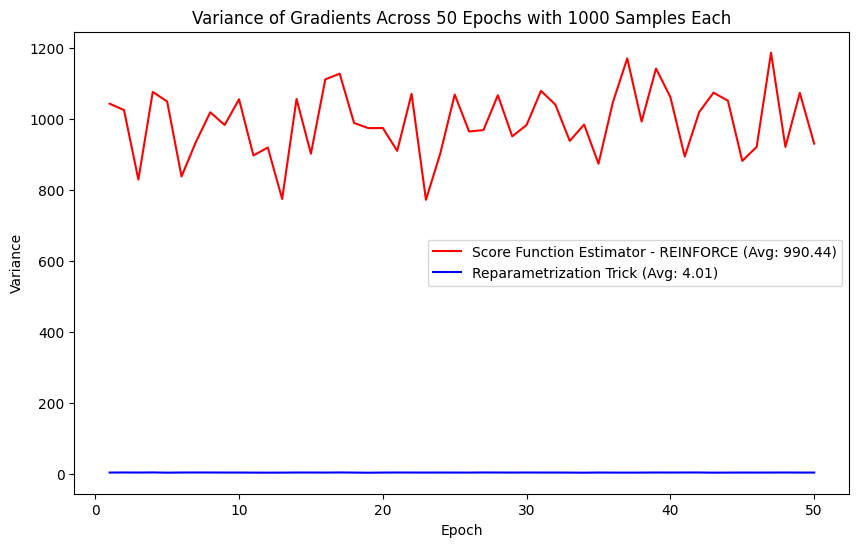

In [25]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

def f(z):
    return z**2

def gradient_reinforce(z, phi):
    # Score function estimator (REINFORCE) for the gradient of f(z) w.r.t phi
    # q_phi(z) is a normal distribution with mean phi and variance 1
    # log(q_phi(z)) = -0.5 * ((z - phi)^2) + constant
    # gradient of log(q_phi(z)) w.r.t phi is (z - phi)
    return f(z) * (z - phi)

def gradient_with_reparam(epsilon, phi):
    z = phi + epsilon
    return 2 * z

phi = 5
num_samples = 1000
num_epochs = 50

variances_without_reparam = []
variances_with_reparam = []

for epoch in range(num_epochs):
    z_samples = np.random.normal(loc=phi, scale=1, size=num_samples)
    gradients_without_reparam = np.array([gradient_reinforce(z, phi) for z in z_samples])

    epsilon_samples = np.random.normal(loc=0, scale=1, size=num_samples)
    gradients_with_reparam = np.array([gradient_with_reparam(epsilon, phi) for epsilon in epsilon_samples])

    variances_without_reparam.append(np.var(gradients_without_reparam))
    variances_with_reparam.append(np.var(gradients_with_reparam))

variances_without_reparam_mean = np.mean(variances_without_reparam)
variances_with_reparam_mean = np.mean(variances_with_reparam)

plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), variances_without_reparam, label=f"Score Function Estimator - REINFORCE (Avg: {round(variances_without_reparam_mean, 2)})", color='red')
plt.plot(range(1, num_epochs + 1), variances_with_reparam, label=f"Reparametrization Trick (Avg: {round(variances_with_reparam_mean, 2)})", color='blue')
plt.title(f"Variance of Gradients Across {num_epochs} Epochs with {num_samples} Samples Each")
plt.xlabel("Epoch")
plt.ylabel("Variance")
plt.legend()
plt.show()